In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nifty = yf.Ticker("TATAMOTORS.NS")
nifty

yfinance.Ticker object <TATAMOTORS.NS>

In [3]:
nifty.info

{'address1': 'Ahura Centre',
 'address2': '4th Floor 82 Mahakali Caves Road, MIDC Andheri (East)',
 'city': 'Mumbai',
 'zip': '400 093',
 'country': 'India',
 'phone': '91 22 6240 7101',
 'website': 'https://www.tatamotors.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tata Motors Limited designs, develops, manufactures, and sells various automotive vehicles. The company offers passenger cars; sports utility vehicles; intermediate and light commercial vehicles; small, medium, and heavy commercial vehicles; defense vehicles; pickups, wingers, buses, vans, and trucks; and electric vehicles, as well as related spare parts and accessories. It also manufactures engines for industrial applications, and aggregates comprising axles and transmissions for commercial vehicles; and factory automation e

In [4]:
nif_hist = nifty.history("max")


In [5]:
nif = yf.download('TATAMOTORS.NS', start ='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
data=pd.DataFrame(nif)
data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,152.195312,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,149.543457,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,149.773666,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,144.654129,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,145.446030,16495776
...,...,...,...,...,...,...
2024-09-24,974.000000,985.000000,972.599976,977.299988,977.299988,12755422
2024-09-25,982.400024,982.500000,959.250000,963.599976,963.599976,12959075
2024-09-26,970.799988,994.950012,965.599976,993.150024,993.150024,21640021


In [9]:

data = data.drop('Adj Close', axis = 1)



In [10]:
data = data.dropna

In [13]:
data=data.reset_index()

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_50,EMA_200,EMA_10,EMA_20
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,152.195312,27906448,163.535919,163.535919,163.535919,163.535919
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,149.543457,23669317,163.424176,163.507567,163.017839,163.264544
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,149.773666,14990820,163.326515,163.481957,162.638927,163.042570
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,144.654129,22722030,163.016959,163.401866,161.328728,162.317833
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,145.446030,16495776,162.752910,163.331039,160.411451,161.743155
...,...,...,...,...,...,...,...,...,...,...,...
3633,2024-09-24,974.000000,985.000000,972.599976,977.299988,977.299988,12755422,1027.910940,936.178862,986.585629,1010.217976
3634,2024-09-25,982.400024,982.500000,959.250000,963.599976,963.599976,12959075,1025.388941,936.451709,982.406419,1005.778166
3635,2024-09-26,970.799988,994.950012,965.599976,993.150024,993.150024,21640021,1024.124670,937.015871,984.359802,1004.575486
3636,2024-09-27,996.000000,1000.400024,989.150024,993.000000,993.000000,10360030,1022.904095,937.572927,985.930747,1003.473059


In [14]:

# You can calculate additional EMAs with different periods if needed
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [ ]:
print(data['Close'].isnull().sum())

In [16]:
data=data.drop(columns = 'EMA_200')

In [17]:
datetime_cols = data[['Date']]
numerical_cols = data.drop(columns=['Date'])

datetime_cols

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3633,2024-09-24
3634,2024-09-25
3635,2024-09-26
3636,2024-09-27


In [18]:
numerical_cols

,Open,High,Low,Close,Adj Close,Volume,EMA_50,EMA_10,EMA_20
0,156.303482,164.040497,156.184769,163.535919,152.195312,27906448,163.535919,163.535919,163.535919
1,162.259598,167.147186,153.246277,160.686478,149.543457,23669317,163.424176,163.017839,163.264544
2,162.200241,162.932388,159.311234,160.933823,149.773666,14990820,163.326515,162.638927,163.042570
3,161.171280,161.923218,154.344498,155.432831,144.654129,22722030,163.016959,161.328728,162.317833
4,156.323273,159.251862,155.343781,156.283707,145.446030,16495776,162.752910,160.411451,161.743155
...,...,...,...,...,...,...,...,...,...
3633,974.000000,985.000000,972.599976,977.299988,977.299988,12755422,1027.910940,986.585629,1010.217976
3634,982.400024,982.500000,959.250000,963.599976,963.599976,12959075,1025.388941,982.406419,1005.778166
3635,970.799988,994.950012,965.599976,993.150024,993.150024,21640021,1024.124670,984.359802,1004.575486
3636,996.000000,1000.400024,989.150024,993.000000,993.000000,10360030,1022.904095,985.930747,1003.473059


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler(feature_range = (0,1))

# Fit the scaler on the feature columns
scaler_features.fit(numerical_cols[['Open', 'High', 'Low','Volume','EMA_50']])
scaler_target.fit(numerical_cols[['Close']])

scaled_features = scaler_features.transform(numerical_cols[['Open', 'High', 'Low','Volume', 'EMA_50']])
scaled_target = scaler_target.transform(numerical_cols[['Close']])


scaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Volume','EMA_50'])
scaled_target_df = pd.DataFrame(scaled_target, columns=['Close'])
result_data = pd.concat([datetime_cols.reset_index(drop=True), scaled_df, scaled_target_df], axis=1)

#scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols.columns)
#result_data =pd.concat([datetime_cols.reset_index(drop=True), scaled_df], axis=1)


In [20]:
result_data

,Date,Open,High,Low,Volume,EMA_50,Close
0,2010-01-04,0.081602,0.087349,0.085676,0.071449,0.075826,0.089586
1,2010-01-05,0.087015,0.090142,0.082960,0.060601,0.075711,0.086988
2,2010-01-06,0.086961,0.086352,0.088566,0.038381,0.075609,0.087213
3,2010-01-07,0.086026,0.085445,0.083975,0.058175,0.075288,0.082197
4,2010-01-08,0.081620,0.083043,0.084899,0.042234,0.075015,0.082973
...,...,...,...,...,...,...,...
3633,2024-09-24,0.824625,0.825555,0.840359,0.032658,0.971982,0.831699
3634,2024-09-25,0.832258,0.823307,0.828018,0.033179,0.969367,0.819206
3635,2024-09-26,0.821717,0.834502,0.833888,0.055405,0.968056,0.846154
3636,2024-09-27,0.844616,0.839403,0.855657,0.026525,0.966791,0.846017


In [21]:
X = []
y = []

timesteps = 10
for i in range(timesteps, len(result_data)):
    X.append(result_data[['Open', 'High', 'Low','Volume', 'EMA_50']].iloc[i-timesteps:i].values)
    y.append(result_data['Close'].iloc[i])

X, y = np.array(X), np.array(y)

import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)


In [22]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [23]:
# Original units and layers
from keras.layers import Input

model = Sequential()

model.add(Input(shape=(X.shape[1], X.shape[2])))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:

history = model.fit(X, y, epochs=100, batch_size=64, validation_split=0.2, shuffle=False)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0037 - val_loss: 0.1023
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 0.0738
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012 - val_loss: 0.0378
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.6186e-04 - val_loss: 0.0165
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.9549e-04 - val_loss: 0.0072
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.9923e-04 - val_loss: 0.0080
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.6575e-04 - val_loss: 0.0122
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.4460e-04 - val_loss: 0.0219
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.3024e-04 - val_loss: 0.0126
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.4129e-04 - val_loss: 0.0112
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.7325e-04 - val_loss: 0.0091
Epoch 12/100
46/46 

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


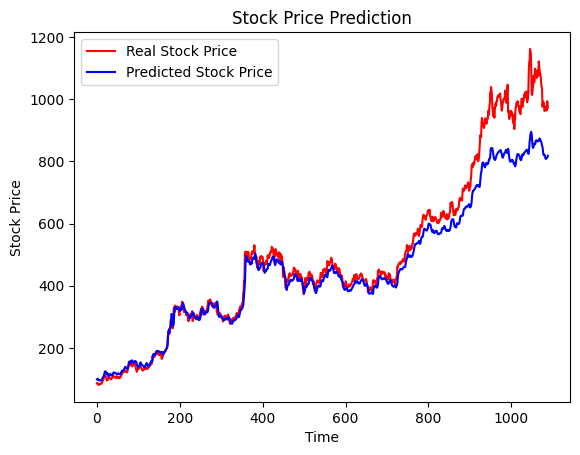

In [25]:
y_pred = model.predict(X_test)

y_pred = scaler_target.inverse_transform(y_pred)
y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.9244082657945987
Mean Absolute Error: 44.195994241397464
Mean Squared Error: 5352.745136457385
Root Mean Squared Error: 73.16245715158414
R-squared: 0.9244082657945987


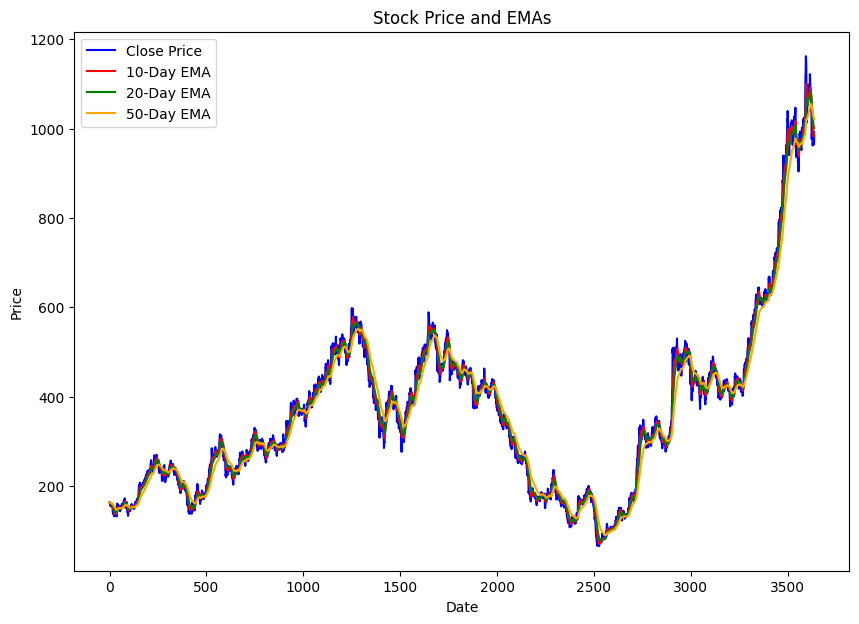

In [27]:
import matplotlib.pyplot as plt

# Plotting to verify the EMA calculations
plt.figure(figsize=(10, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['EMA_10'], label='10-Day EMA', color='red')
plt.plot(data['EMA_20'], label='20-Day EMA', color='green')
plt.plot(data['EMA_50'], label='50-Day EMA', color='orange')

plt.title('Stock Price and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
